In [1]:
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Importando os dados para um dataframe
df = pd.read_csv(
    "DadosFalha.csv", 
    na_values=['NA', '?']).drop(["Unnamed: 0","F"], axis=1)
    
lb = preprocessing.LabelBinarizer()
df["Reativa_binarized"] = lb.fit_transform(df['Reativa'])

# Convert to numpy - Classification
features_cols_names = ['Poropressão', 'CoefEmp', 'AlfaBiot', 'AngAtrito','Coesao','Tensao']
x = df[features_cols_names].values
y = df["Reativa_binarized"]

In [2]:
print("Amount of data: ", df.shape[0])

Amount of data:  1000000


In [3]:
## Analysing label distribution

In [4]:
temp_df = df.groupby(["Reativa", "Reativa_binarized"]).size().reset_index(name="count")
temp_df["Percentage"] = round((temp_df["count"]/temp_df["count"].sum())*100, 2)
temp_df

,Reativa,Reativa_binarized,count,Percentage
0,Não Reativa,0,749768,74.98
1,Reativa,1,250232,25.02


In [5]:
## Analyzing features distributions

([<matplotlib.axis.YTick at 0x27f3ee81d30>,
 [Text(0, 0, 'P'),
  Text(0, 1, 'k0'),
  Text(0, 2, 'α'),
  Text(0, 3, 'ϕ'),
  Text(0, 4, 'c'),
  Text(0, 5, 'σ')])

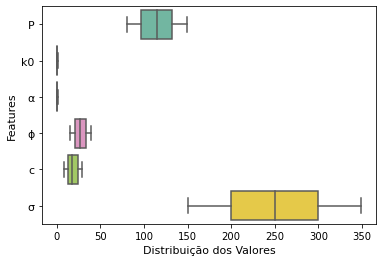

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.xlabel( "Distribuição dos Valores" , size = 11 ) 
plt.ylabel( "Features" , size = 11 ) 
ax = sns.boxplot(data=df[features_cols_names], orient="h",palette="Set2")
ticks, labels = plt.yticks()
plt.yticks(ticks, labels=['P', 'k0','α','ϕ','c','σ'], size=11)


## Some conclusions
- Looking at the boxplot above, we can see that each feature has its own kind of distribution which seems to be not Normal. Furthermore, the range of values varies over the features.
- Given that, we should normalize the features before building a linear discriminant analysis

In [7]:
from sklearn.preprocessing import StandardScaler

# Split into validation and training sets
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
scaler.fit(x_train)

x_train_normalized = scaler.transform(x_train)
x_test_normalized = scaler.transform(x_test)

In [8]:
pd.DataFrame(x_train_normalized, columns=features_cols_names).describe()

,Poropressão,CoefEmp,AlfaBiot,AngAtrito,Coesao,Tensao
count,7.500000e+05,7.500000e+05,7.500000e+05,7.500000e+05,7.500000e+05,7.500000e+05
mean,3.706718e-16,4.044494e-14,1.907571e-14,-7.099160e-16,4.246801e-16,1.000500e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.709988e+00,-1.732320e+00,-1.731005e+00,-1.664673e+00,-1.655099e+00,-1.725989e+00
25%,-8.684086e-01,-8.669253e-01,-8.669712e-01,-8.325738e-01,-8.671681e-01,-8.594338e-01
50%,2.267511e-02,2.112568e-03,-2.494574e-04,-4.741119e-04,7.834936e-02,7.121118e-03
75%,8.642541e-01,8.648483e-01,8.662661e-01,8.316256e-01,8.662806e-01,8.563450e-01
max,1.705833e+00,1.732651e+00,1.733299e+00,1.663725e+00,1.654212e+00,1.722900e+00


In [9]:
pd.DataFrame(x_test_normalized,columns=features_cols_names).describe()

,Poropressão,CoefEmp,AlfaBiot,AngAtrito,Coesao,Tensao
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,0.000398,-0.006091,0.001270,0.002211,-0.001687,-0.002450
std,0.998941,1.000387,1.000857,0.998946,1.000198,1.000180
min,-1.709988,-1.732278,-1.731004,-1.664673,-1.655099,-1.725989
25%,-0.868409,-0.871105,-0.865918,-0.832574,-0.867168,-0.859434
50%,0.022675,-0.011732,0.002585,-0.000474,-0.079237,-0.010210
75%,0.864254,0.861254,0.865297,0.831626,0.866281,0.856345
max,1.705833,1.732650,1.733292,1.663725,1.654212,1.722900


In [10]:
temp_df= pd.DataFrame(y_train).groupby("Reativa_binarized").size().reset_index(name="count")
temp_df["Percentage"] = round((temp_df["count"]/temp_df["count"].sum())*100, 2)
temp_df

,Reativa_binarized,count,Percentage
0,0,562580,75.01
1,1,187420,24.99


In [11]:
y_train.shape

(750000,)

In [12]:
temp_df= pd.DataFrame(y_test).groupby("Reativa_binarized").size().reset_index(name="count")
temp_df["Percentage"] = round((temp_df["count"]/temp_df["count"].sum())*100, 2)
temp_df

,Reativa_binarized,count,Percentage
0,0,187188,74.88
1,1,62812,25.12


In [13]:
y_test.shape

(250000,)

        Poropressão   CoefEmp  AlfaBiot  AngAtrito    Coesao    Tensao
0         -1.165436  1.121599 -0.981268   0.276892 -1.024754 -0.703454
1         -1.511969 -0.512535  0.913286  -1.525990 -0.394409 -0.304839
2         -0.323857 -1.091544 -0.122282  -1.248624  1.654212 -0.807441
3          0.072180 -0.971000 -1.687523   0.970309  0.078349  0.527054
4          1.606824  0.198729  0.648233   1.386359 -0.551996 -0.374163
...             ...       ...       ...        ...       ...       ...
749995     0.963263  0.876697  0.326812   1.663725  0.078349  1.549589
749996    -1.264446 -0.262883  0.284199   0.970309 -0.394409  1.566920
749997     0.666236 -0.858136 -0.275462   0.831626  1.496626 -0.252845
749998     1.408805  1.112035 -1.563925  -1.387307 -0.236823 -0.599467
749999     1.260291  1.701698 -0.437701   1.525042  0.551108  1.116311

[750000 rows x 6 columns]


([<matplotlib.axis.YTick at 0x27f3f638a90>,
 [Text(0, 0, 'P'),
  Text(0, 1, 'k0'),
  Text(0, 2, 'α'),
  Text(0, 3, 'ϕ'),
  Text(0, 4, 'c'),
  Text(0, 5, 'σ')])

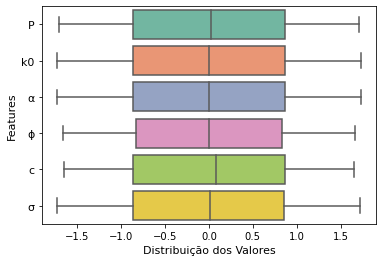

In [14]:
# BoxPlot x_train_normalized
import matplotlib.pyplot as plt
import seaborn as sns
data_norm_x_train=pd.DataFrame(x_train_normalized, columns=features_cols_names)
print(data_norm_x_train)
ax = sns.boxplot(data=data_norm_x_train, orient="h", palette="Set2")
plt.xlabel( "Distribuição dos Valores" , size = 11 ) 
plt.ylabel( "Features" , size = 11 ) 
ticks, labels = plt.yticks()
plt.yticks(ticks, labels=['P', 'k0','α','ϕ','c','σ'], size=11)

        Poropressão   CoefEmp  AlfaBiot  AngAtrito    Coesao    Tensao
0         -0.868409  0.643638  0.765688   1.247675 -1.024754 -0.530143
1         -0.125839  0.375381  0.954194   0.415576 -1.497513  0.180432
2         -1.412960 -1.112378  1.292712  -0.277841  1.181453 -1.656664
3          0.121684  1.350639  0.894562  -1.109940  1.023867  1.722900
4          0.270198  1.191342 -0.676667   1.663725 -0.551996 -1.431360
...             ...       ...       ...        ...       ...       ...
249995     1.210787  0.696053 -0.247270   1.108992  0.866281 -0.634130
249996    -1.214941 -0.013316  0.073892  -0.000474 -0.867168  0.215094
249997     0.022675 -1.356885  1.181391  -1.109940  0.551108  0.232425
249998     0.468217 -0.419524  0.151672   0.554259  1.654212  1.549589
249999     0.517722 -1.509525 -0.904847  -1.664673  0.866281 -1.102069

[250000 rows x 6 columns]


([<matplotlib.axis.YTick at 0x27f3f7099d0>,
 [Text(0, 0, 'P'),
  Text(0, 1, 'k0'),
  Text(0, 2, 'α'),
  Text(0, 3, 'ϕ'),
  Text(0, 4, 'c'),
  Text(0, 5, 'σ')])

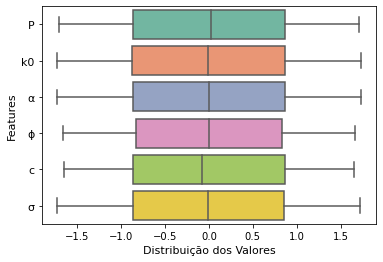

In [15]:
# BoxPlot x_test_normalized
import matplotlib.pyplot as plt
import seaborn as sns
data_norm_x_test=pd.DataFrame(x_test_normalized, columns=features_cols_names)
print(data_norm_x_test)
bx = sns.boxplot(data=data_norm_x_test, orient="h", palette="Set2")
plt.xlabel( "Distribuição dos Valores" , size = 11 ) 
plt.ylabel( "Features" , size = 11 ) 
ticks, labels = plt.yticks()
plt.yticks(ticks, labels=['P', 'k0','α','ϕ','c','σ'], size=11)

## Train a linear discriminant analysis

In [16]:
# LDA
#Dados de Entrada
x_train_normalized
#Dados de Saída
y_train
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(x_train_normalized, y_train)
LinearDiscriminantAnalysis()

LinearDiscriminantAnalysis()

In [17]:
clf.predict(x_test_normalized)

array([0, 0, 0, ..., 1, 0, 1])

In [18]:
df_testLDA=pd.DataFrame(clf.predict(x_test_normalized))

In [19]:
df_testLDA.columns=['LDA']
df_testLDA
df_testLDA.count()
aval= pd.DataFrame(df_testLDA).groupby("LDA").size().reset_index(name="count")
print(aval)

   LDA   count
0    0  179798
1    1   70202


In [20]:
from sklearn.metrics import accuracy_score

correct = accuracy_score(y_test,df_testLDA)
print(f"Accuracy: {correct}")

Accuracy: 0.967224


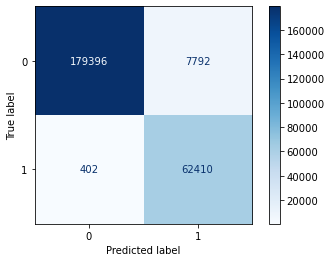

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test.to_list(), df_testLDA)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["0", "1"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, df_testLDA, target_names=["0", "1"]))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    187188
           1       0.89      0.99      0.94     62812

    accuracy                           0.97    250000
   macro avg       0.94      0.98      0.96    250000
weighted avg       0.97      0.97      0.97    250000



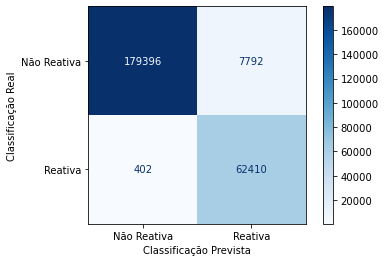

In [23]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test.to_list(), df_testLDA)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Não Reativa", "Reativa"])
disp.plot(cmap=plt.cm.Blues)
plt.ylabel('Classificação Real')
plt.xlabel('Classificação Prevista')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test.to_list(), df_testLDA)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Não Reativa", "Reativa"])
disp.plot(cmap=plt.cm.Blues)
plt.ylabel('Classificação Real')
plt.xlabel('Classificação Prevista')
plt.show()

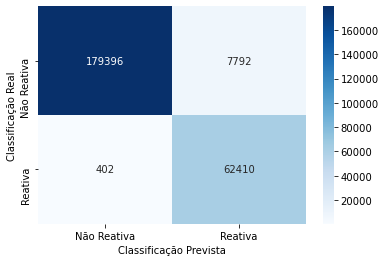

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt    

ax= plt.subplot()

cm = confusion_matrix(y_test.to_list(), df_testLDA)
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap="Blues");  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Classificação Prevista');ax.set_ylabel('Classificação Real');
#ax.set_title('Matriz de Confusão');
ax.xaxis.set_ticklabels(['Não Reativa', 'Reativa']); ax.yaxis.set_ticklabels([ 'Não Reativa','Reativa']);